In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random

2.0


<function matplotlib.pyplot.show(close=None, block=None)>

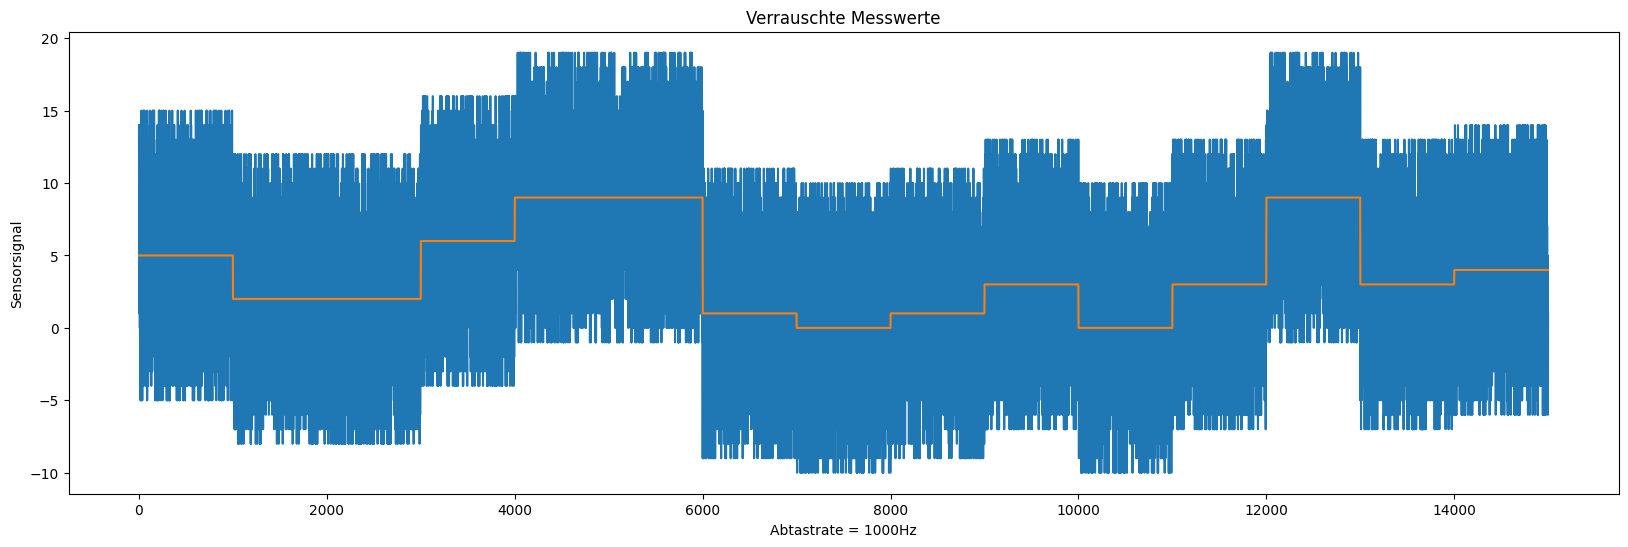

In [32]:
# Input of coordinates

coords = [5, 2, 2, 6, 9, 9, 1, 0, 1, 3, 0, 3, 9, 3, 4]
coord_duration = 1000 # 1000 Hz = 1 second
pause_duration = 200

clean_signal = np.array([])

for i in coords:
    clean_signal = np.append(clean_signal, np.array([i]*coord_duration))
    #clean_signal = np.append(clean_signal, np.array([0]*pause_duration))

a_signal = clean_signal.copy()

for n in range(0,a_signal.shape[0]):
    a_signal[n] += random.randint(-10, 10)

filtered_signal = np.median(a_signal[1300:1900])
print(filtered_signal)

# create x-achsis
x = range(len(clean_signal))

plt.figure(figsize=(20,6))

plt.plot(x, a_signal)
plt.plot(x, clean_signal)

plt.title("Verrauschte Messwerte")
plt.xlabel("Abtastrate = 1000Hz")
plt.ylabel("Sensorsignal")


plt.show

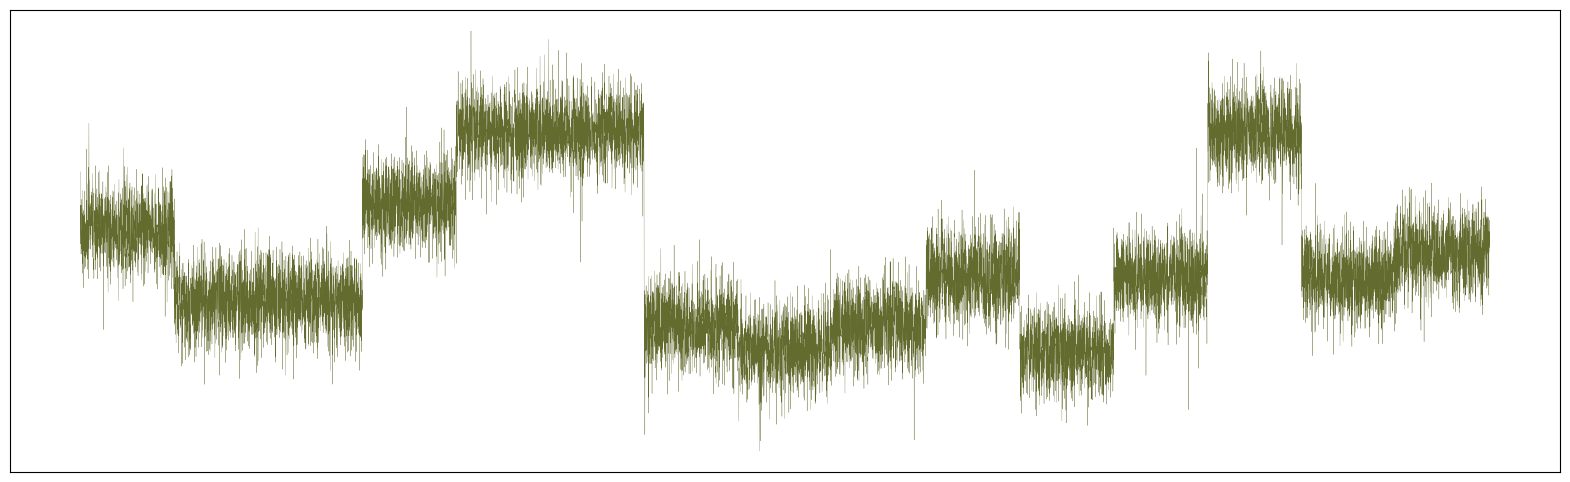

5


In [33]:
def add_impulse_noise(x, p=0.01, amp=10, signed=True, rng=None):
    rng = np.random.default_rng(rng)
    x = np.asarray(x, dtype=float).copy()
    mask = rng.random(x.shape) < p
    if signed:
        spikes = rng.choice([-1.0, 1.0], size=x.shape) * amp
    else:
        spikes = amp
    x[mask] += spikes[mask]
    return x

def add_gauss_plus_spikes(x, sigma=1.0, p=0.005, amp=3, rng=None):
    rng = np.random.default_rng(rng)
    x = np.asarray(x, dtype=float).copy()
    x += rng.normal(0, sigma, size=x.shape)          # kleines Grundrauschen
    x = add_impulse_noise(x, p=p, amp=amp, rng=rng)  # seltene Spikes
    return x

test_signal = add_gauss_plus_spikes(clean_signal)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x, test_signal, linewidth=0.2, color='#636B2F')

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
plt.savefig("19-artificial_signal.png")
plt.show()

print(round(np.median(test_signal[10:990])))


In [34]:
np.savetxt("19-daten.csv", test_signal, delimiter=",", fmt="%.6f")